# Scikit-learn. Regression

https://scikit-learn.org/stable/index.html 

In [34]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
x_data, y_data = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
x_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
y_data

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [20]:
X_train, X_test, y_train, y_test  = train_test_split(x_data, y_data, test_size=0.2)

In [21]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


## Linear regression

In [22]:
model = linear_model.LinearRegression()

In [23]:
# model.predict(X_test) # first need to train

In [24]:
model.fit( X_train, y_train )

LinearRegression()

In [25]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [26]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'train mae: {mae_train}')
print(f'test mae: {mae_test}')
print(f'train mse: {mse_train}')
print(f'test mse: {mse_test}')


train mae: 0.5290384494349539
test mae: 0.5401424258713827
train mse: 0.5171407138603289
test mse: 0.5554517280860074


## XGBoost model

https://xgboost.readthedocs.io/en/stable/

In [27]:
import xgboost

In [28]:
xgb_model = xgboost.XGBRegressor(n_estimators=60, max_depth=5)
xgb_model.fit( X_train, y_train )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=24,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'train mae: {mae_train}')
print(f'test mae: {mae_test}')
print(f'train mse: {mse_train}')
print(f'test mse: {mse_test}')
# Seems like overfitting

train mae: 0.262290928353241
test mae: 0.326580858034115
train mse: 0.14197646764301053
test mse: 0.24183653043496442


## XGBoost logistic regression

In [31]:
x_data, y_data = datasets.fetch_covtype(return_X_y=True, as_frame=True)
x_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
y_data

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [35]:
x_data = x_data[:100000]
y_data = y_data[:100000]

In [36]:
y_data.shape

(100000,)

In [37]:
X_train, X_test, y_train, y_test  = train_test_split(x_data, y_data, test_size=0.2)

In [38]:
xgb_model = xgboost.XGBClassifier()
xgb_model.fit( X_train, y_train )

c:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=24,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

In [41]:
print (f'train acc: {xgb_model.score( X_train, y_train )}' )
print (f'test acc: {xgb_model.score( X_test, y_test )}' )

train acc: 0.9726125
test acc: 0.94035


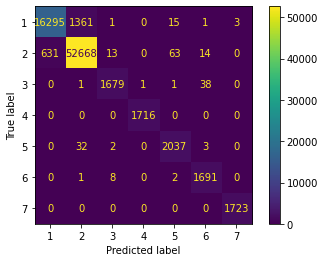

In [40]:
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=pred_train )

In [50]:
print (f'predicted class: {xgb_model.predict(X_test[:1])}')
print (f'probabilities: {xgb_model.predict_proba(X_test[:1]).round(3)}')
print (f'true class: {y_test[:1]}')

predicted class: [2]
probabilities: [[0.017 0.983 0.    0.    0.    0.    0.   ]]
true class: 67022    2
Name: Cover_Type, dtype: int32
